<a href="https://colab.research.google.com/github/romilp3058/LeadScoring/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment_1
## Romil Patel
## 3755481

# 1. Create your own python notebook from code examples that downloads and imports the MNIST dataset.

## Importing necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Loading the dataset and summary

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique classes in training labels: [0 1 2 3 4 5 6 7 8 9]
Unique classes in test labels: [0 1 2 3 4 5 6 7 8 9]
Sample images from the training set:


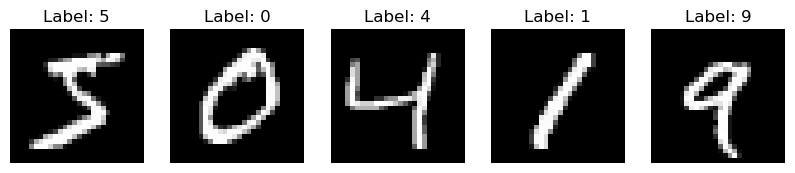

In [ ]:
# Print the shape of the data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Print unique classes in the dataset
print("Unique classes in training labels:", np.unique(train_labels))
print("Unique classes in test labels:", np.unique(test_labels))

# Display some sample images
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Show first 5 samples from training data
print("Sample images from the training set:")
plot_sample_images(train_images, train_labels)

## Functions for plotting accuracy and loss graphs

In [ ]:
# Function to plot training and validation accuracy
def plot_accuracy(history, title="Training and Validation Accuracy"):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

In [ ]:
# Function to plot training and validation loss
def plot_loss(history, title="Training and Validation Loss"):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()

In [ ]:
# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Create a model by constructing your own selection of layers.

## Defining model parameters

In [ ]:
# Define the model
def create_model(dropout_rate=0.3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. Train the model on the MNIST dataset for at least 10 epochs.

## Training the model on the dataset and plotting graphs for model evaluation

In [ ]:
# Training the model for 10 epochs
model = create_model()
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=10)

Epoch 1/10


/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8169 - loss: 0.5927 - val_accuracy: 0.9531 - val_loss: 0.1602
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9464 - loss: 0.1778 - val_accuracy: 0.9647 - val_loss: 0.1182
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9600 - loss: 0.1311 - val_accuracy: 0.9700 - val_loss: 0.1022
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.9636 - loss: 0.1177 - val_accuracy: 0.9678 - val_loss: 0.1099
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.9694 - loss: 0.0992 - val_accuracy: 0.9732 - val_loss: 0.0862
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9732 - loss: 0.0865 - val_accuracy: 0.9753 - val_loss: 0.0880
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9722 - loss: 0.0815 - val_accuracy: 0.9746 - val_loss: 0.0895
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.9742 - loss: 0.07

# 4. Capture the training history and plot the training and validation accuracy curves.

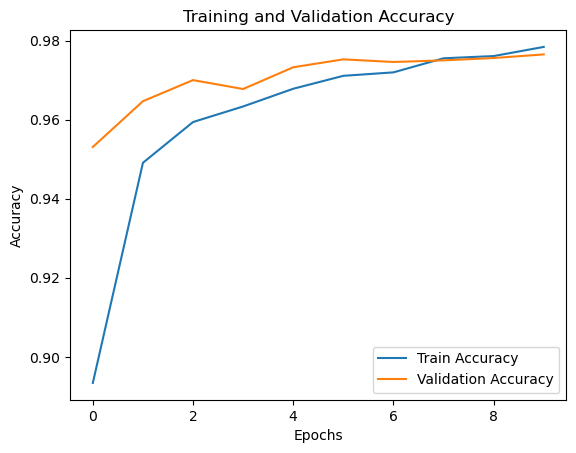

In [ ]:
plot_accuracy(history)

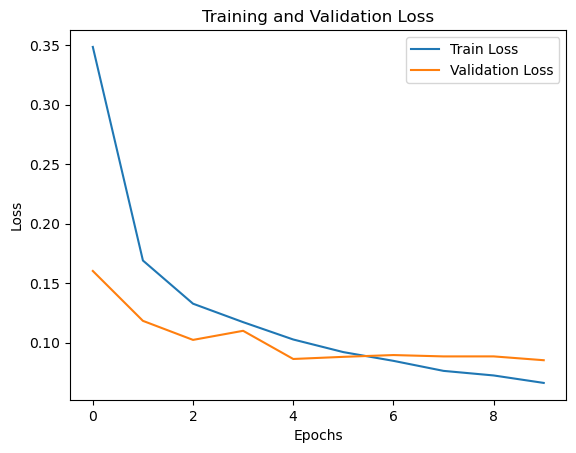

In [ ]:
plot_loss(history)

#### As evidient from the graphs above, the model is performing well with accuracy rising for both test and validation set and loss declining for both the sets with each epoch until they reach saturation.

# 5. Train the model again for a sufficient amount of epoch that you can start to see overfitting.

In [ ]:
# Continue training to induce overfitting
history_overfit = model.fit(train_images, train_labels, validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.9803 - loss: 0.0592 - val_accuracy: 0.9772 - val_loss: 0.0884
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9805 - loss: 0.0570 - val_accuracy: 0.9751 - val_loss: 0.0955
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9809 - loss: 0.0586 - val_accuracy: 0.9768 - val_loss: 0.0875
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9816 - loss: 0.0523 - val_accuracy: 0.9770 - val_loss: 0.0871
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9829 - loss: 0.0506 - val_accuracy: 0.9780 - val_loss: 0.0834
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9825 - loss: 0.0505 - val_accuracy: 0.9776 - val_loss: 0.0939
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.9822 - loss: 0.0520 - val_accuracy: 0.9763 - val_loss: 0.0928
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.9840 -

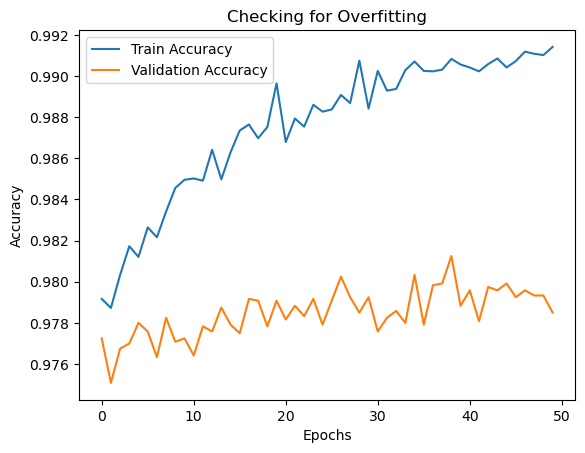

In [ ]:
plot_accuracy(history_overfit, title="Checking for Overfitting")

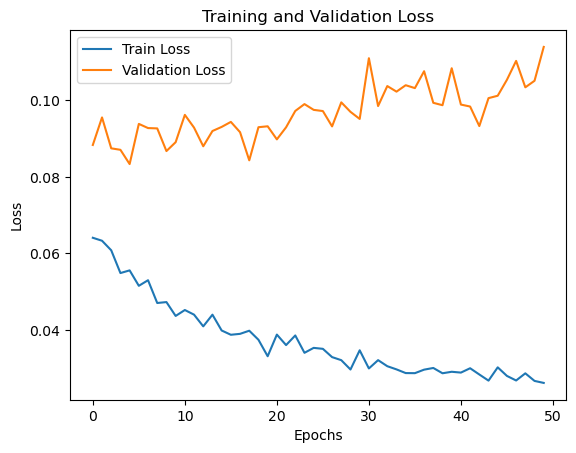

In [ ]:
plot_loss(history_overfit)

## We can see that the increase in training accuracy is far greater than the improvement in the validation set accuracy after 10 epochs.
## Additionaly, we can observe a large difference in the training and validation loss, with validation loss being far greater than the training loss.
## These 2 observations indicate that the model starts to overfit after being trained for more than 10 epochs.

# 6. Now experiment with 3 different configuration of either the architecuture or training parameters and show the difference in the training curves.

## Here we train the model using 3 different dropout rates- 0, 0.5 and 0.7.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8588 - loss: 0.4782 - val_accuracy: 0.9584 - val_loss: 0.1423
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.9633 - loss: 0.1188 - val_accuracy: 0.9670 - val_loss: 0.1082
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9783 - loss: 0.0722 - val_accuracy: 0.9665 - val_loss: 0.1167
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9738 - val_loss: 0.0919
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9728 - val_loss: 0.0988
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9752 - val_loss: 0.0958
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.9747 - val_loss: 0.1041
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.9921 -

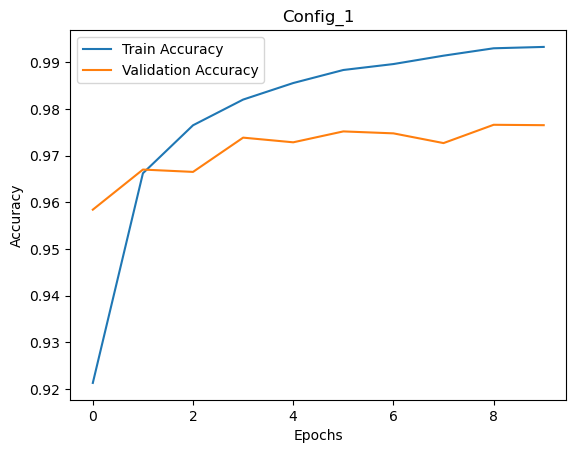

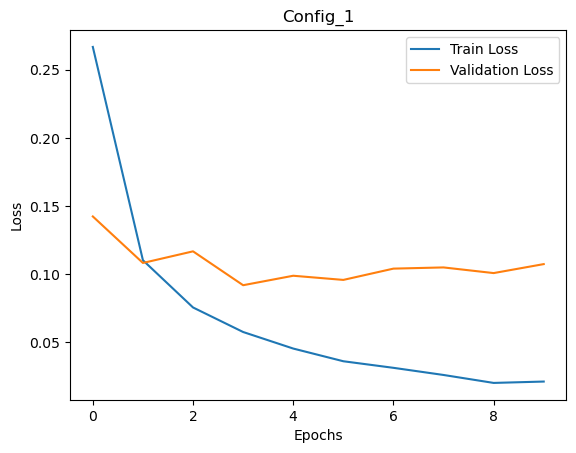

In [ ]:
model1 = create_model(dropout_rate=0)
history1 = model1.fit(train_images, train_labels, validation_split=0.2, epochs=10)
plot_accuracy(history1, title="Config_1")
plot_loss(history1, title="Config_1")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9761 - val_loss: 0.1169
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9953 - loss: 0.0130 - val_accuracy: 0.9765 - val_loss: 0.1157
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9762 - val_loss: 0.1201
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.9723 - val_loss: 0.1424
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9753 - val_loss: 0.1387
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9730 - val_loss: 0.1623
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9783 - val_loss: 0.1288
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9974 -

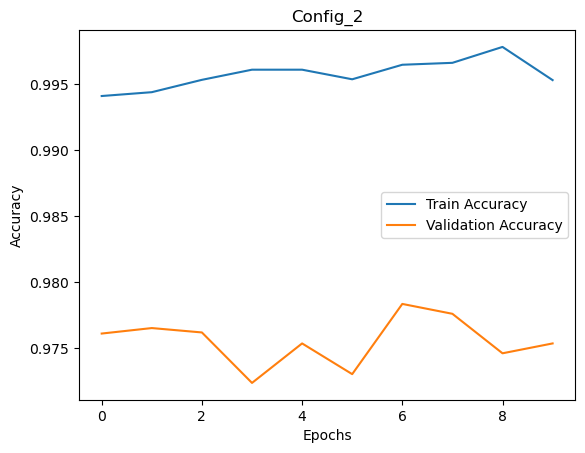

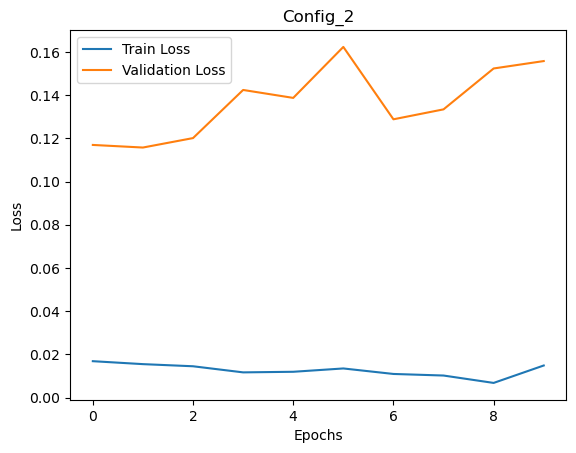

In [ ]:
model2 = create_model(dropout_rate=0.5)
history2 = model1.fit(train_images, train_labels, validation_split=0.2, epochs=10)
plot_accuracy(history2, title="Config_2")
plot_loss(history2, title="Config_2")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9773 - val_loss: 0.1474
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9982 - loss: 0.0044 - val_accuracy: 0.9732 - val_loss: 0.1785
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9761 - val_loss: 0.1529
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9748 - val_loss: 0.1717
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9727 - val_loss: 0.1856
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9760 - val_loss: 0.1581
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9768 - val_loss: 0.1607
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9981 -

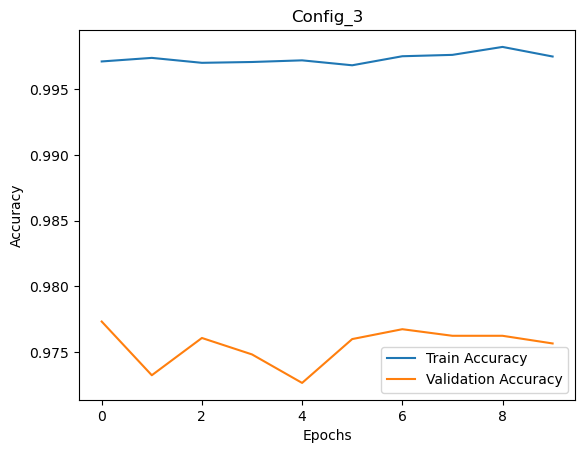

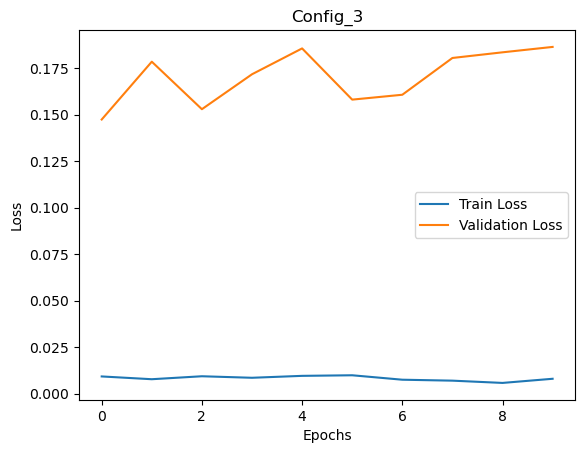

In [ ]:
model3 = create_model(dropout_rate=0.7)
history3 = model1.fit(train_images, train_labels, validation_split=0.2, epochs=10)
plot_accuracy(history3, title="Config_3")
plot_loss(history3, title="Config_3")

## The validation accuracy saturates at around the 3rd epoch when the dropout rate is 0. For dropout rates of 0.5 and 0.7, the model produces similar results when considering training and validation for both accuracy and loss(being almost constant throughout).

# 7. Create a custom test set by capturing your own images, saving them in google drive, and importing them into your notebook.

### The test set contains 2-4 images of each number saved in a separate folder for each distinct number.
### Applying data augmentation to increase the number of total images in the test set. The code generates 5 augmented images for each image.
### This cell of code was run twice.

# 8. Generate classifications for your custom test set and report on the performance.

Found 1036 images belonging to 10 classes.


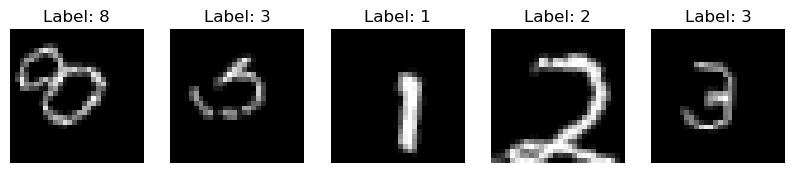

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Path to the folder containing folders with images of each digit
custom_test_path = 'test'

datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Load images with augmentation
test_generator = datagen.flow_from_directory(
    custom_test_path,
    target_size=(28, 28),   # Resizing to 28x28 to match MNIST input size
    color_mode="grayscale",
    batch_size=1,           # Process one image at a time to control augmentation
    class_mode='sparse',
    shuffle=True
)

# Visualize some augmented images
def visualize_augmented_images(generator, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        images, labels = next(generator)  # Get the next batch (1 image)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[0].reshape(28, 28), cmap='gray')  # Use images[0] as each batch has only one image
        plt.title(f"Label: {int(labels[0])}")
        plt.axis('off')
    plt.show()

# Visualize 5 augmented images
visualize_augmented_images(test_generator, num_images=5)

# Collect predictions and true labels for confusion matrix
y_pred = []
y_true = []

# Iterate through the test generator to collect predictions
for i in range(len(test_generator)):
    images, labels = next(test_generator)  # Get the next batch (1 image)
    pred = model.predict(images)  # Predict the label
    y_pred.append(np.argmax(pred, axis=1)[0])  # Get the predicted class
    y_true.append(int(labels[0]))  # Get the true label

 465/1036 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.3693 - loss: 8.0675

/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1036/1036 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.3971 - loss: 7.8529
Loss on augmented test set: 7.600513935089111
Accuracy on augmented test set: 41.89%


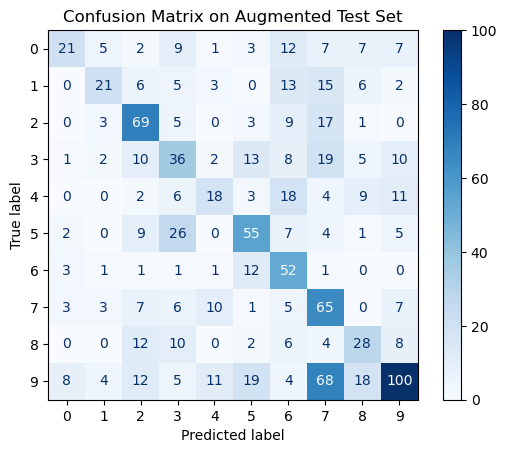

In [ ]:
# Evaluating the model on augmented images to get loss and accuracy
scores = model1.evaluate(test_generator, verbose=1)
print(f"Loss on augmented test set: {scores[0]}")
print(f"Accuracy on augmented test set: {scores[1] * 100:.2f}%")

# Plotting the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Augmented Test Set")
plt.show()

In [ ]:
import os

# Path to the main folder containing subfolders '0' to '9'
base_path = 'test'

# Dictionary to store the count of images in each folder
image_counts = {}

# Loop through each folder in the base path
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count the number of files in the folder
        num_images = len([file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        image_counts[folder_name] = num_images

# Display the number of images in each folder
for label, count in image_counts.items():
    print(f"Folder '{label}': {count} images")

Folder '9': 243 images
Folder '0': 72 images
Folder '7': 107 images
Folder '6': 72 images
Folder '1': 72 images
Folder '8': 71 images
Folder '4': 71 images
Folder '3': 108 images
Folder '2': 108 images
Folder '5': 108 images


## As evidient, the model performs poorly on the self dataset with an accuracy of 41.89% and loss of 7.6.
## Looking at the confusion matrix, the model fails to distinguish between numbers with similar shaped such as 5,9 and 7; 3 and 5; 1 and 7.
## The test data looks highly imbalanced with greater number of instances for the number 9.